In [1]:
%load_ext autoreload
%autoreload 2

In [19]:
from matplotlib import rc
rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'png'
% config InlineBackend.rc = {'figure.figsize': (5,3.5)}

In [4]:
import numpy as np
import cvxpy as cvx
from helper import *

In [5]:
from cd.model.distrs import RademacherDistribution
import cd.model.synth_data as synth

In [6]:
p = 2
R_true = RademacherDistribution()
X_true = [RademacherDistribution(),RademacherDistribution()]
M_true = synth.GaussianMarket(X_true,R_true)

In [7]:
n_true = 10_000
X_true,r_true = M_true.sample(n_true)

In [8]:
def conv2q(n,m=100,lamb=1/2):
    idx = np.random.choice(n_true,size=(m,n))
    X = X_true[idx,:]
    r = r_true[idx]

    q = 1/(2*lamb) * (X*r[:,:,None]).mean(axis=1)
    return q

In [9]:
ns = np.arange(5,205,5)
l = len(ns)
norm = np.zeros(l)
mn = np.zeros(l)
for i,n in enumerate(ns):
    qs = conv2q(n,m=5000)
    mn[i] = np.linalg.norm(qs,axis=1).mean()
    norm[i] = np.linalg.norm(qs,axis=1).max()


In [10]:
qstar = (X_true*r_true[:,None]).mean(axis=0)
qsnorm = np.linalg.norm(qstar)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


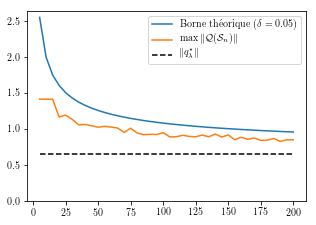

In [20]:
delta = 0.05
tol = np.sqrt(np.log(1/delta))
omq = qsnorm + 2*tol*np.sqrt(3/(2*ns))
plt.plot(ns,omq,label="Borne th\\'eorique ($\delta = 0.05$)")
plt.plot(ns,norm,label='$\max\|\mathcal{Q}(\mathcal{S}_n)\|$')
plt.plot(ns,0*ns+qsnorm,'k--',label='$\|q^\star_\lambda\|$')
plt.legend()
# plt.plot(ns,[0.4811]*l)
# plt.title('$\max\|q\|$')
plt.axis(ymin=0); 

In [12]:
def indp(p,n=10_000,lamb=1/2):
    X = np.random.randn(n,p)
    r = np.random.randn(n)
    q = 1/(2*lamb) * (X*r[:,None]).mean(axis=1)
    return q

def indX(p,n=10_000,lamb=1/2):
    X = 1/np.sqrt(p) * np.random.randn(n,p)
    r = X.sum(axis=1)
    q = 1/(2*lamb) * (X*r[:,None]).mean(axis=1)
    return q

def depX(p,n=10_000,lamb=1/2):
    r = np.random.randn(n)
    X = np.tile(r,(p,1)).T
    q = 1/(2*lamb) * (X*r[:,None]).mean(axis=1)
    return q

In [13]:
ps = np.arange(2,50)
depx = np.zeros(len(ps))
for i,p in enumerate(ps):
    q = depX(p)
    depx[i] = np.linalg.norm(q)

In [14]:
plt.plot(ps,indps)
plt.plot(ps,indpx)
plt.plot(ps,depx)

NameError: name 'indps' is not defined

In [15]:
def conv2qp(n,p,m=100,lamb=1/2):
    n_true = 10_000
    R_true = RademacherDistribution()
    X_true = [RademacherDistribution() for _ in range(p)]
    M_true = synth.GaussianMarket(X_true,R_true)
    X_true,r_true = M_true.sample(n_true)

    idx = np.random.choice(n_true,size=(m,n))
    X = X_true[idx,:]
    r = r_true[idx]

    q = 1/(2*lamb) * (x*r[:,:,None]).mean(axis=1)
    return q
    

In [16]:
def conv2(n,m=100,lamb=1/2):
    idx = np.random.choice(n_true,size=(m,n))
    X = X_true[idx,:]
    r = r_true[idx]

    q = 1/(2*lamb) * (X*r[:,:,None]).mean(axis=1)

    insample = (r*np.einsum('mnp,mp->mn',X,q)).mean(axis=1)
    outsample = (r_true * np.einsum('tp,mp->mt',X_true,q)).mean(axis=1)
    return insample,outsample

In [17]:
ns = np.arange(5,205,5)
m = 1000
diff = np.empty((len(ns),m))
for i,n in enumerate(ns):
    ins,outs = conv2(n,m)
    diff[i] = ins-outs

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


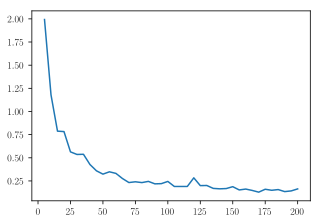

In [18]:
plt.plot(ns,diff.max(axis=1))

In [20]:
lamb = 1/2
delta = 0.03
rms = r_true.max()**2
beta = rms/(2*lamb*ns)


In [21]:
plt.plot(ns,diff,label='Erreur maximale')
plt.plot(ns,rms*(1/ns+4*np.sqrt(np.log(1/delta)/(2*ns))),label="Borne th\\'eorique")
plt.plot(ns,mn,label='Moyenne')
plt.plot(ns,mn+std,label="D\\'eviation")
# plt.plot(ns,mn,label='Erreur moyenne')
plt.legend()
plt.xlabel('$n$');
plt.title('$p=\mathcal{O}(1)$');
# plt.savefig('fig/rad_bounds.pdf',bbox_inches='tight',pad_inches=0)

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.gca().set_xscale(mpl.scale.LogTransformBase)

AttributeError: type object 'LogTransformBase' has no attribute 'lower'

In [1]:
from cd.model.distrs import E,Var,RademacherDistribution

In [3]:
Var(RademacherDistribution())

1.0